In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
df = pd.read_csv('grid_search.csv')
df.columns = ['scale', 'psm', 'img'] + list(df.columns.values[3:])

In [9]:
df.head()

,scale,psm,img,tha_title,tha_firstname,tha_lastname,eng_title,eng_firstname,eng_lastname
0,"(1, 2, 0.05)",3,100,1.000000,0.200000,0.551724,1.000000,0.875000,0.700000
1,"(1, 2, 0.05)",3,101,0.142857,0.266667,0.166667,0.117647,0.307692,0.444444
2,"(1, 2, 0.05)",3,102,1.000000,0.727273,0.769231,1.000000,0.833333,0.888889
3,"(1, 2, 0.05)",3,103,1.000000,0.727273,0.800000,1.000000,0.800000,1.000000
4,"(1, 2, 0.05)",3,104,0.000000,0.000000,0.580645,1.000000,1.000000,1.000000


In [10]:
df = df.set_index('scale')

In [31]:
def plot(img_id):
    fig, axes = plt.subplots(nrows=2, ncols=2)
    
    for i, psm in enumerate([3, 8, 12, 13]):
        ax = axes[i//2, i%2]
        schema = ['tha_title', 'tha_firstname', 'tha_lastname', 'eng_title', 'eng_firstname', 'eng_lastname']
        data = df[(df.img == img_id) & (df.psm == psm)][schema]
        xticks = data.index.values
        title = 'Image {} PSM {}'.format(img_id, psm)
        yticks = np.arange(0, 1.1, 0.1)
        data.plot(xticks=range(6), title=title, ax=ax, figsize=(15, 10), yticks=yticks)
        ax.set_xticklabels(xticks)
    
    return fig

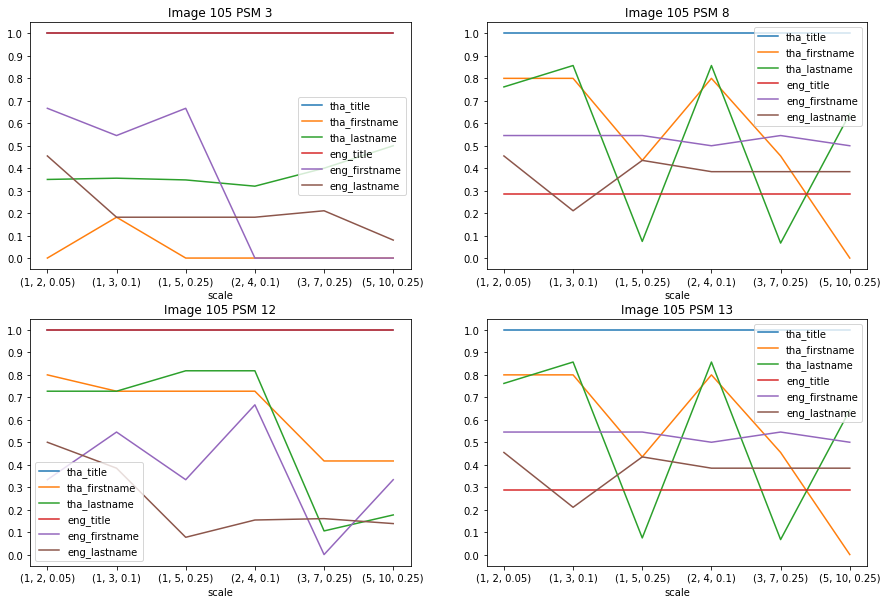

In [32]:
f = plot(105)

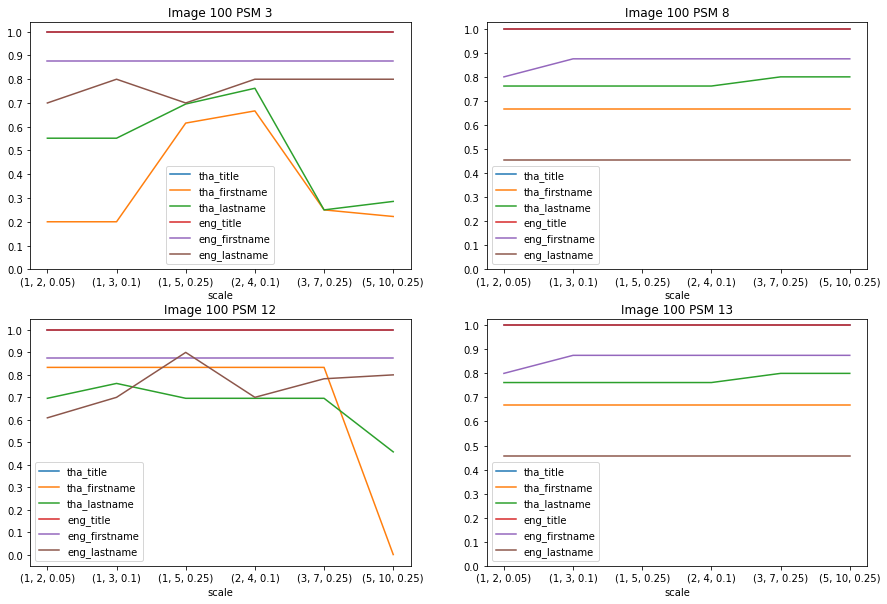

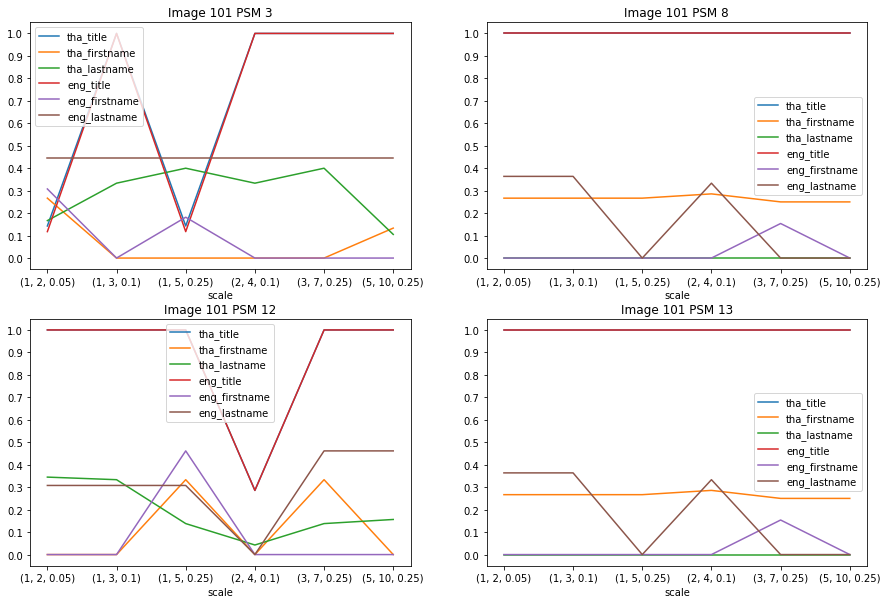

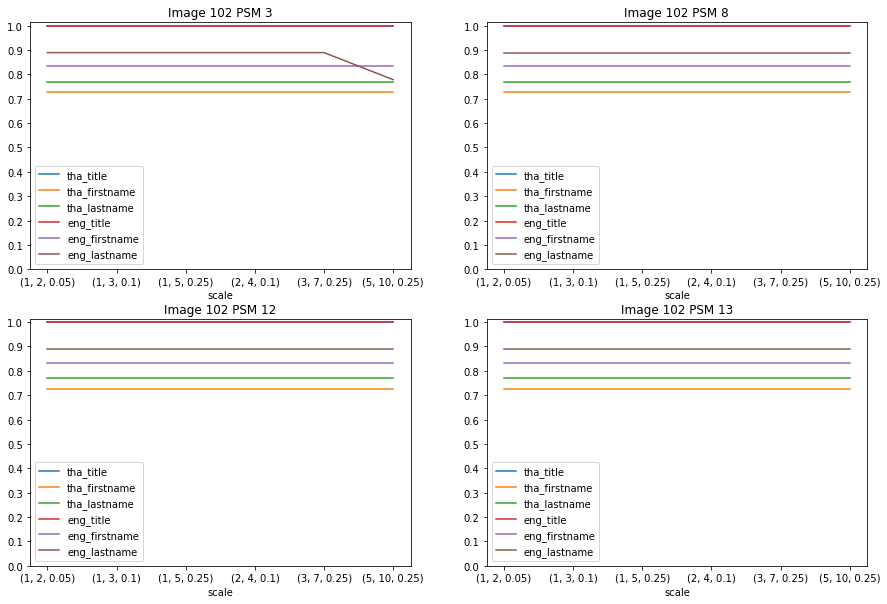

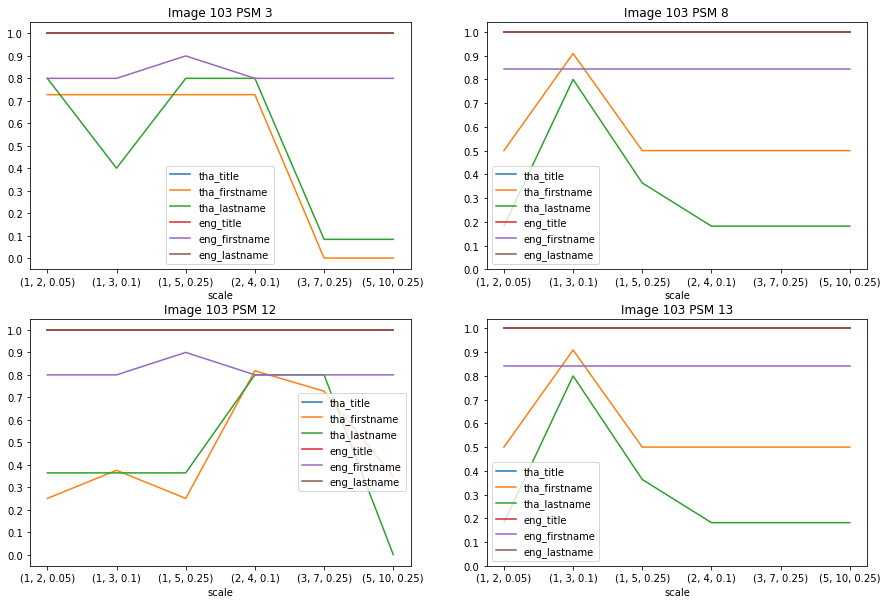

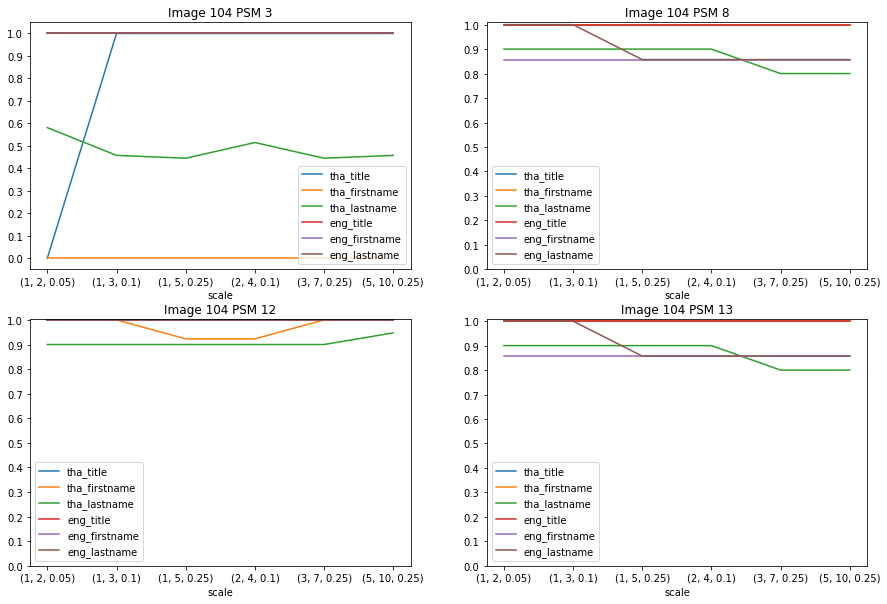

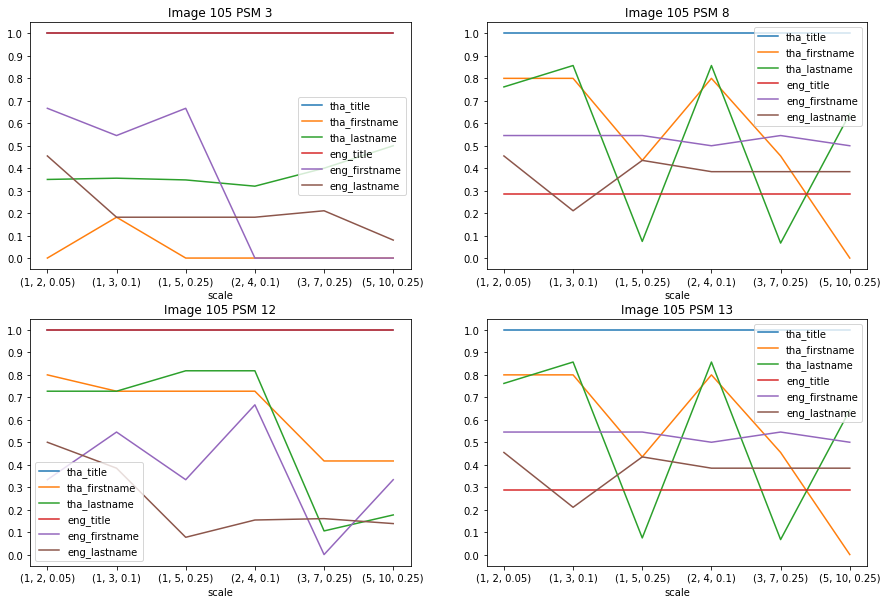

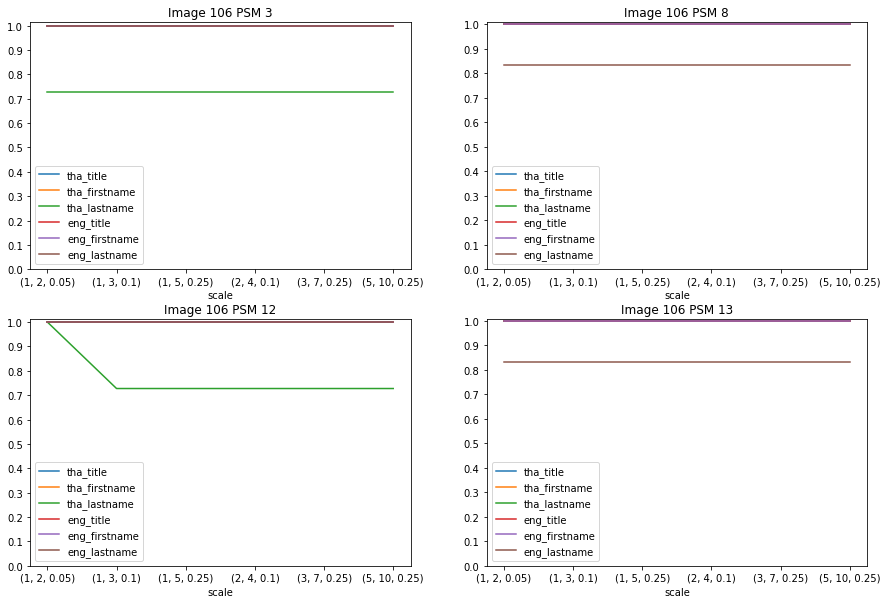

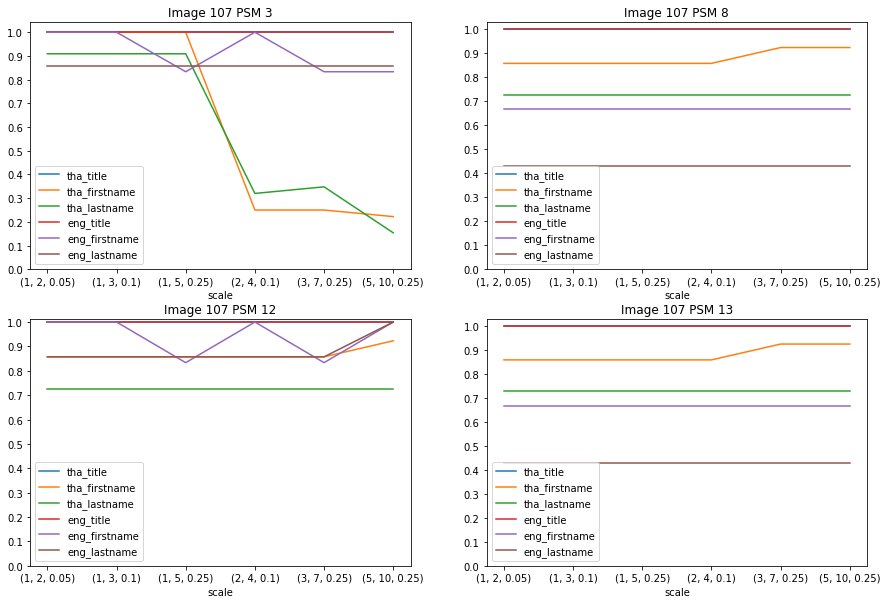

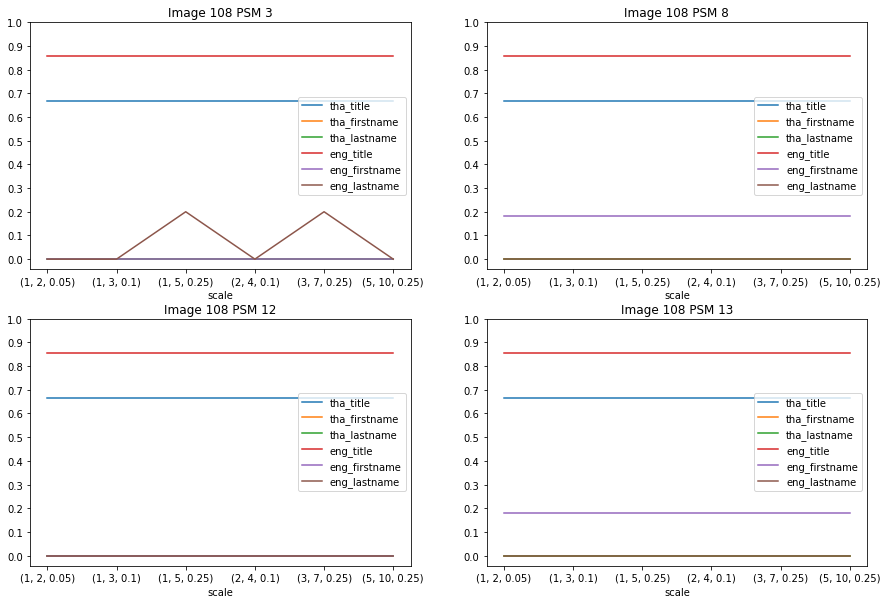

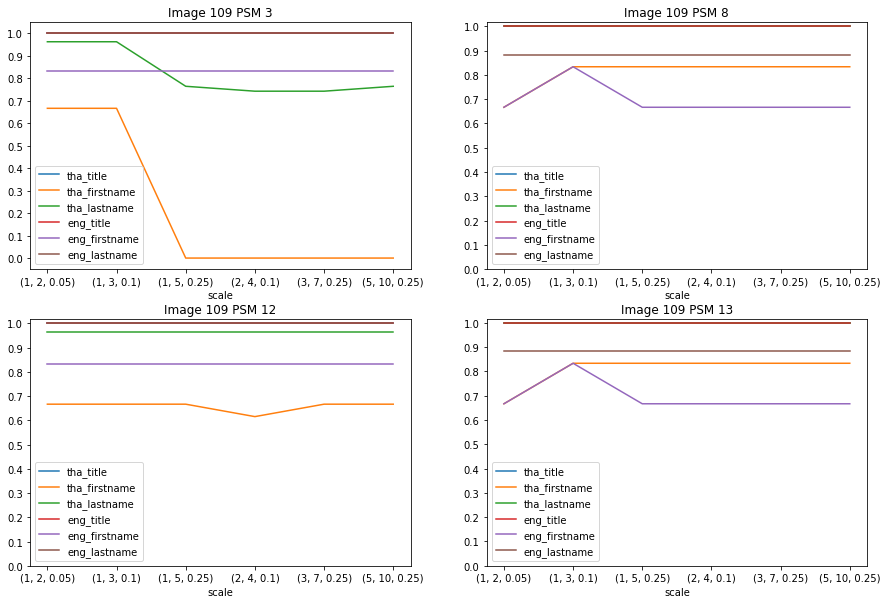

In [30]:
for img_id in range(100, 110):
    f = plot(img_id)
    f.savefig('grid-search/{}.png'.format(img_id), pad_inches=3, bbox_inches='tight')